### Requirements
-----

In [1]:
import PIL
PIL.__version__

'10.3.0'

In [2]:
import google.generativeai as genai
genai.__version__

'0.7.1'

In [3]:
import googlemaps
googlemaps.__version__

'4.10.0'

-----

## Gemini API

In [29]:
GOOGLE_API_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [5]:
import os

In [6]:
img = PIL.Image.open('data/MontyPython.jpeg')

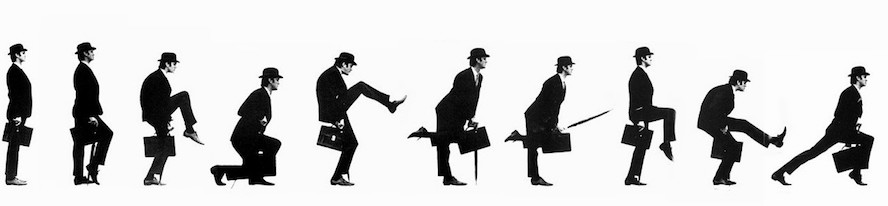

In [7]:
img

In [8]:
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

In [9]:
response = model.generate_content(["What is in this photo?", img]) # /!\ API call --> €€€

In [10]:
print(response.text)

The photo shows a group of men in suits and bowler hats walking in a synchronized fashion. It is a famous image from the Beatles movie "A Hard Day's Night".


In [27]:
response = model.generate_content(["What is in this photo?", img]) # /!\ API call --> €€€

In [28]:
print(response.text)

The photo shows nine men dressed in suits and bowler hats walking in a line. They are all in the same position, but each one is slightly out of sync with the others. This creates the illusion that they are walking in a coordinated fashion, but their movements are actually very awkward and unnatural. The photo is a famous image from the Beatles' film "A Hard Day's Night," and it has come to represent the band's irreverent and playful attitude.


## Maps APIs

In [30]:
GMAPS_API_KEY = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [14]:
gmaps = googlemaps.Client(key=GMAPS_API_KEY)

In [15]:
from alive_progress import alive_bar
import time

In [16]:
def gmaps_places(address):
    text_search = gmaps.places(address) # /!\ API call --> €€€
    if len(text_search["results"])>0:
        ts = text_search["results"][0]
        return {"name": ts["name"], 
                "address": ts["formatted_address"], 
                "place_id": ts["place_id"], 
                "lat_lng": (ts["geometry"]["location"]["lat"],ts["geometry"]["location"]["lng"]) }
    return {}

In [17]:
place = gmaps_places("McDonald's, 3 All. Darius Milhaud, 75019 Paris")

In [18]:
place

{'name': "McDonald's",
 'address': '3 All. Darius Milhaud, 75019 Paris, France',
 'place_id': 'ChIJL7hk0sVt5kcRAaKgdbpe0RY',
 'lat_lng': (48.8832999, 2.3854553)}

In [19]:
def gmaps_place(place_id):
    place_details = gmaps.place(place['place_id'],fields=["formatted_phone_number"]) # /!\ API call --> €€€
    return place_details["result"].get("formatted_phone_number","")

In [20]:
gmaps_place("ChIJL7hk0sVt5kcRAaKgdbpe0RY")

'01 42 03 73 12'

In [21]:
def gmaps_places_nearby(location, type_of_store, radius=1000):
        """
        :param location: tuple of the form (latitude, longitude)
        :param type_of_store: str
        :param radius: int (m)
        :return:
        """
        try:
            geolocation_str = str(location)[1:-1].replace(' ', '').strip()
            return gmaps.places_nearby(location=geolocation_str,
                                       radius=radius,
                                       type=type_of_store)['results']
        except ValueError:
            return None
        except googlemaps.exceptions.ApiError:
            logger.warning('Api error for geolocation %s', geolocation_str)
            return None

In [22]:
# https://developers.google.com/maps/documentation/places/web-service/supported_types
type_of_store = "supermarket"

In [23]:
res = gmaps_places_nearby((48.8832999, 2.3854553), type_of_store, 300) # /!\ API call --> €€€

In [24]:
for r in res:
    print(r["name"], r["vicinity"], r.get("rating",None))

Franprix 2 Rue Georges Auric, Paris 3.5
Franprix 96 Rue de Crimée, Paris 3.7
Carrefour City 96 Rue de Crimée, Paris 2.3
L.G.M.E Alimentation 2 Rue Georges Auric, Paris None
cocciMarket 28 Allée Darius Milhaud, Paris None
